<a href="https://colab.research.google.com/github/PhiLNNT/Academic/blob/Subgradient-method-for-Lasso-regression/SubgradientMethod_RealData_LASSO_PROBLEMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT BODYFAT PERCENTAGE**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
!pip install wget
import wget
from os import path
!pip install libsvm
from libsvm.svmutil import svm_read_problem
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=2e6f3c7a230a32d967a5e30b9362bafb9d3a38ee478cb2502937c8b1e52cf1cf
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp310-cp310-linux_x86_64.whl size=251406 sha256=347d81e318bd8ce04a534b9b3f4d6616212462aaf2d9a2258e03fe7df6c1ab6a
  Stored in directory: /root/.cache/pip/wheels/79/c7/19/a8c85928f8e629654b8e1adb3c8091f0bb77344d0ee9954a85
Successfully built libsvm


/usr/local/lib/python3.10/dist-packages/libsvm/svm.py:149: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def csr_to_problem_jit(l, x_val, x_ind, x_rowptr, prob_val, prob_ind, prob_rowptr, indx_start):


# **Get data**

In [3]:
#get dataset: bodyfat
wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/bodyfat_scale','bodyfat_scale')

'bodyfat_scale'

In [4]:
y_fat, A_fat = svm_read_problem('bodyfat_scale')

v = DictVectorizer(sparse=False)
A_fat = v.fit_transform(A_fat)
y_fat=np.array(y_fat)
y_fat=y_fat.reshape(-1,1)
print('mxn: ', A_fat.shape)
print((A_fat))
print((y_fat))
print(np.hstack((A_fat,y_fat)))

mxn:  (252, 14)
[[-0.482105  -0.966102  -0.707746  ... -0.287129  -0.0791367 -0.535714 ]
 [-0.743158  -1.        -0.552422  ... -0.435644   0.136691  -0.142857 ]
 [ 0.0652632 -1.        -0.709789  ... -0.60396   -0.395683  -0.714286 ]
 ...
 [ 0.233684   0.694915  -0.44206   ... -0.356436  -0.107914  -0.214286 ]
 [ 0.0947368  0.694915  -0.40936   ... -0.435644   0.208633   0.428571 ]
 [ 0.343158   0.762712  -0.27243   ... -0.118812   0.294964   0.821429 ]]
[[1.0708]
 [1.0853]
 [1.0414]
 [1.0751]
 [1.034 ]
 [1.0502]
 [1.0549]
 [1.0704]
 [1.09  ]
 [1.0722]
 [1.083 ]
 [1.0812]
 [1.0513]
 [1.0505]
 [1.0484]
 [1.0512]
 [1.0333]
 [1.0468]
 [1.0622]
 [1.061 ]
 [1.0551]
 [1.064 ]
 [1.0631]
 [1.0584]
 [1.0668]
 [1.0911]
 [1.0811]
 [1.0468]
 [1.091 ]
 [1.079 ]
 [1.0716]
 [1.0862]
 [1.0719]
 [1.0502]
 [1.0263]
 [1.0101]
 [1.0438]
 [1.0346]
 [1.0202]
 [1.0258]
 [1.0217]
 [1.025 ]
 [1.0279]
 [1.0269]
 [1.0814]
 [1.067 ]
 [1.0742]
 [1.0665]
 [1.0678]
 [1.0903]
 [1.0756]
 [1.084 ]
 [1.0807]
 [1.0848]


# **Split data to train - test sets**

In [5]:
# split data to train - test
from sklearn.model_selection import train_test_split
A_train, A_test, y_train, y_test = train_test_split(A_fat, y_fat, test_size=0.2, random_state=42)
print('A_train shape' , A_train.shape)
print('A_test shape' , A_test.shape)
print('y_train shape' , y_train.shape)
print('y_test shape' , y_test.shape)

A_train shape (201, 14)
A_test shape (51, 14)
y_train shape (201, 1)
y_test shape (51, 1)


In [6]:
A_train_bar=np.hstack((A_train,np.ones((A_train.shape[0],1))))
A_train_bar

array([[-0.0821053, -0.423729 , -0.605559 , ...,  0.0503597, -0.535714 ,
         1.       ],
       [-0.0484211,  0.0847458, -0.350092 , ...,  0.323741 ,  0.107143 ,
         1.       ],
       [ 0.465263 , -0.254237 , -0.145718 , ...,  0.395683 , -0.428571 ,
         1.       ],
       ...,
       [-0.642105 , -0.152542 , -0.617821 , ...,  0.0359712, -0.0714286,
         1.       ],
       [-0.288421 , -0.423729 , -0.0496628, ...,  0.654676 ,  0.464286 ,
         1.       ],
       [-0.153684 , -0.355932 , -0.556509 , ...,  0.179856 , -0.0714286,
         1.       ]])

# **Objective function:**
# $f(x) = \frac{1}{2}\|Ax-b\|^2 + \mu\|x\|_1$

# **Define subgradient algorithm function**

In [7]:
def subgradient_descent(x,step_size=0.01,iter=100,step_style='sqrt'):
    lst_cost=[]
    lst_x=[]
    def subgradient(x):
        I=np.zeros_like(x)
        I[x!=0]=mu*np.sign(x[x!=0])
        I[x==0]=np.random.rand(x[x==0].shape[0])*2-1
        v=A.T@(A@x-b)+I
        return v
    def cost(x):
        return 0.5*np.linalg.norm(A@x-b)**2+mu*np.linalg.norm(x,ord=1)

    new_cost=cost(x)
    lst_cost.append(new_cost)
    lst_x.append(x)


    for i in range(1,iter+1):

        v=subgradient(x)

        if np.linalg.norm(v)<1e-10:
            lst_cost.append(new_cost)
            lst_x.append(x)

            print('Stopped by subgradient = 0 at ',i,'-th iterattion')
            return  lst_cost,lst_x,i

        if i <10:
              x=x-step_size*v

        else:
              # x=x-step_size*v/(np.linalg.norm(v)*np.log10(np.sqrt(i)))
              x=x-step_size*v/(np.linalg.norm(v)*np.log10(i))

        new_cost=cost(x)

        if i%10==1:
            print('iter %d' %i + ' cost: %.6f' %new_cost)

        if abs(new_cost-lst_cost[-1])<1e-20:
            lst_cost.append(new_cost)
            lst_x.append(x)
            print('Stopped by early stopping at ',i,'-th iterattion')
            return  lst_cost,lst_x,i
        lst_cost.append(new_cost)
        lst_x.append(x)
    print('Stopped by max iteration')
    return lst_cost,lst_x,i


# **Initial data step**

In [8]:
A=A_train_bar
b=y_train
m,n=A.shape
mu=0.01
print('A =', A[:5])
print('b =', b[:5])
print('Cấp của ma trận A là: mxn =', m,'x',n)
print('\u03BC =' , mu)

A = [[-0.0821053  -0.423729   -0.605559    0.709845   -0.412935   -0.521968
  -0.575604   -0.661882   -0.421446   -0.614907   -0.554054   -0.217822
   0.0503597  -0.535714    1.        ]
 [-0.0484211   0.0847458  -0.350092    0.761658   -0.124378   -0.00527241
  -0.222363   -0.53429    -0.501247   -0.378882   -0.608108    0.0990099
   0.323741    0.107143    1.        ]
 [ 0.465263   -0.254237   -0.145718    0.668394   -0.0248756   0.486819
   0.130877   -0.295056   -0.187032   -0.0931677  -0.635135   -0.00990099
   0.395683   -0.428571    1.        ]
 [-0.427368   -0.0169492  -0.74862     0.668394   -0.631841   -0.525483
  -0.702668   -0.639553   -0.670823   -0.565217   -0.675676   -0.356436
  -0.23741    -0.285714    1.        ]
 [ 0.246316   -0.898305   -0.280605    0.668394   -0.0248756   0.110721
  -0.209657   -0.323764    0.0573566  -0.0310559  -0.256757   -0.158416
   0.251799   -0.0714286   1.        ]]
b = [[1.0491]
 [1.0473]
 [1.0209]
 [1.0678]
 [1.0322]]
Cấp của ma trận A là

In [9]:
np.random.seed(1)
W=np.random.rand(A_train_bar.shape[1],1)*2-1
#W=np.random.randint(1,10,(A_train_bar.shape[1],1))
print(W)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]]


# **General step**

In [10]:
%%time
lst_cost, lst_x,iter =subgradient_descent(W,step_size=0.001,iter=100000)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
iter 50031 cost: 0.012084
iter 50041 cost: 0.012084
iter 50051 cost: 0.012084
iter 50061 cost: 0.012084
iter 50071 cost: 0.012085
iter 50081 cost: 0.012085
iter 50091 cost: 0.012084
iter 50101 cost: 0.012085
iter 50111 cost: 0.012084
iter 50121 cost: 0.012084
iter 50131 cost: 0.012085
iter 50141 cost: 0.012085
iter 50151 cost: 0.012085
iter 50161 cost: 0.012085
iter 50171 cost: 0.012084
iter 50181 cost: 0.012084
iter 50191 cost: 0.012085
iter 50201 cost: 0.012084
iter 50211 cost: 0.012085
iter 50221 cost: 0.012084
iter 50231 cost: 0.012085
iter 50241 cost: 0.012084
iter 50251 cost: 0.012084
iter 50261 cost: 0.012085
iter 50271 cost: 0.012085
iter 50281 cost: 0.012084
iter 50291 cost: 0.012084
iter 50301 cost: 0.012085
iter 50311 cost: 0.012084
iter 50321 cost: 0.012085
iter 50331 cost: 0.012084
iter 50341 cost: 0.012084
iter 50351 cost: 0.012084
iter 50361 cost: 0.012084
iter 50371 cost: 0.012085
iter 50381 cost: 0.012084
iter 50

# **Result and Graph**

In [11]:
print('Solution obtained by algorithm')
#x_pred=lst_x[-1]
x_pred=lst_x[lst_cost.index(min(lst_cost))]
print(x_pred)
print('best iteration: ', lst_cost.index(min(lst_cost)))
print('best cost fuction: ',min(lst_cost))
#print('best object: ',lst_x[lst_cost.index(min(lst_cost))])

Solution obtained by algorithm
[[-5.31726460e-02]
 [ 9.04202281e-05]
 [-1.53419717e-06]
 [ 5.21050755e-04]
 [-8.25019045e-06]
 [ 4.36147316e-07]
 [-4.67675145e-05]
 [-4.29923650e-05]
 [-8.17943756e-05]
 [-2.02826454e-05]
 [-4.85847790e-04]
 [-6.94884520e-05]
 [-1.18631949e-05]
 [ 6.90747313e-04]
 [ 1.04484897e+00]]
best iteration:  99237
best cost fuction:  0.012082964751654157


In [12]:
A_test_bar=np.hstack((A_test,np.ones((A_test.shape[0],1))))
y_pred=A_test_bar@x_pred
print(y_pred)
print(y_test)
u=y_pred.flatten()
v=y_test.flatten()
print(u)
print(v)

[[1.0556988 ]
 [1.05543217]
 [1.03560969]
 [1.0526197 ]
 [1.06106317]
 [1.07133571]
 [1.04576922]
 [1.0570331 ]
 [1.07246283]
 [1.0713308 ]
 [1.04069261]
 [1.04398376]
 [1.06562796]
 [1.04811419]
 [1.08454614]
 [1.08657907]
 [1.04906992]
 [1.05144101]
 [1.05274877]
 [1.06704964]
 [1.06549794]
 [1.06152804]
 [1.06783496]
 [1.06755977]
 [1.05077828]
 [1.03075998]
 [1.0460461 ]
 [1.06487931]
 [1.08266291]
 [1.06972108]
 [1.04255039]
 [1.07721617]
 [1.05924928]
 [1.05768525]
 [1.05675856]
 [1.09025134]
 [1.05045539]
 [1.06268815]
 [1.06165242]
 [1.07265589]
 [1.06802205]
 [1.04575078]
 [1.02864937]
 [1.07760552]
 [1.06757287]
 [1.04799151]
 [1.03334825]
 [1.05044859]
 [1.04639083]
 [1.07620388]
 [1.01981433]]
[[1.0549]
 [1.0549]
 [1.0355]
 [1.0521]
 [1.0607]
 [1.0713]
 [1.0462]
 [1.0563]
 [1.0722]
 [1.0716]
 [1.0396]
 [1.0433]
 [1.065 ]
 [1.0477]
 [1.0847]
 [1.0873]
 [1.0488]
 [1.0512]
 [1.0524]
 [1.0668]
 [1.0648]
 [1.061 ]
 [1.0671]
 [1.0674]
 [1.0502]
 [1.0304]
 [1.0453]
 [1.0646]
 [1.0

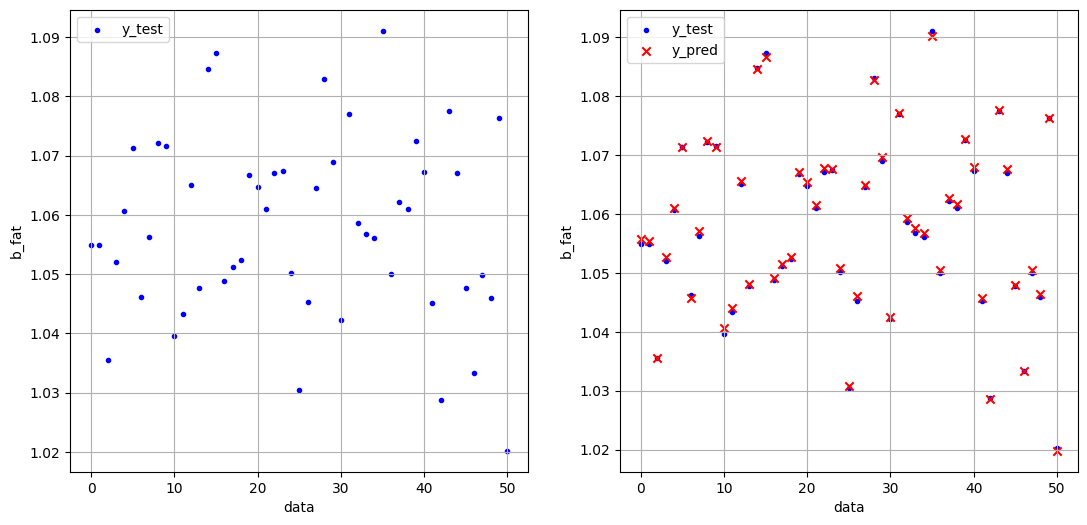

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 6))
fig.add_subplot(121)
plt.scatter([i for i in range(len(y_pred.flatten()))],y_test.flatten(),marker=".",c='b',label="y_test")
plt.xlabel('data')
plt.ylabel('b_fat')
plt.legend(loc='upper left')
plt.grid(True)
fig.add_subplot(122)
plt.scatter([i for i in range(len(y_pred.flatten()))],y_test.flatten(),marker=".",c='b',label="y_test")
plt.scatter([i for i in range(len(y_pred.flatten()))],y_pred.flatten(),marker="x",c='r',label="y_pred")
plt.xlabel('data')
plt.ylabel('b_fat')
plt.legend(loc='upper left')
plt.grid(True)

# **Analyze**

<ipython-input-14-ae46bb11c8cd>:2: RuntimeWarning: invalid value encountered in log10
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
<ipython-input-14-ae46bb11c8cd>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')


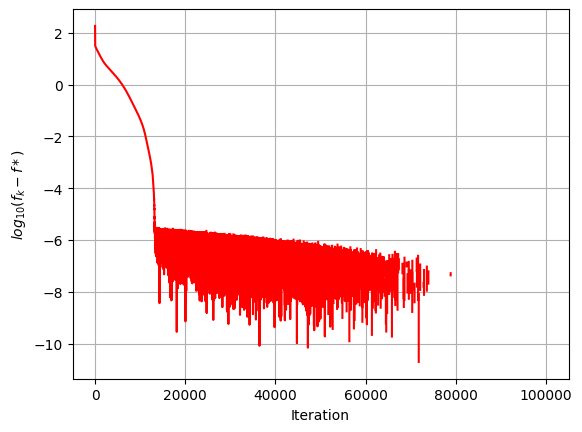

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
plt.xlabel('Iteration')
plt.ylabel('$log_{10}(f_k-f*)$')
plt.grid(True)

<ipython-input-15-f9e0270959a9>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter+1)],np.array(lst_cost),'b',color='red')


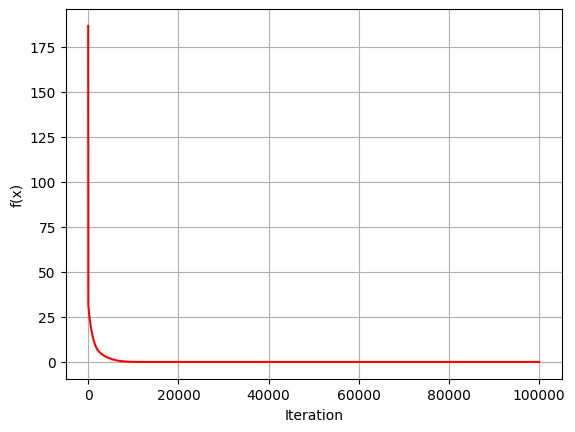

In [15]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(iter+1)],np.array(lst_cost),'b',color='red')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.grid(True)